In [71]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F


In [72]:
# Data directories and paths
input_data_dir = 'input_data'
output_data_dir = 'output_data'
data_date = "2018-01-01"
data_time = "12:00"
input_name = "input_surface"

In [73]:
layer_name = "/b1/Add_7_output_0"
head = 5

In [74]:
# Load input data
input_path = os.path.join('..', input_data_dir, data_date, data_time, f"{input_name.replace('/', '_')}.npy")
input_data = np.load(input_path)  
input_data = input_data[3]  

In [75]:
# Set up longitudes and latitudes
lons = np.linspace(0, 360, 1440)
lons_shifted = np.where(lons > 180, lons - 360, lons)
lats = np.linspace(90, -90, 721)

In [76]:
path = os.path.join('..', input_data_dir, data_date, data_time, f"{input_name.replace('/', '_')}.npy")
input_surface = np.load(path)

In [77]:
patch_size_lat = 4
patch_size_lon = 4

chunk_size_lat = 48
chunk_size_lon = 96

lat_index = 3
lon_index = 14

lat_start = lat_index * chunk_size_lat
lat_end = lat_start + chunk_size_lat
lon_start = lon_index * chunk_size_lon
lon_end = lon_start + chunk_size_lon

lat_end = min(lat_end, input_surface.shape[1])
lon_end = min(lon_end, input_surface.shape[2])

In [78]:
surface_var_idx = {
    "MSLP": 0,
    "U10": 1,
    "V10": 2,
    "T2M": 3,
}

weather_var = "T2M"

In [79]:
path = os.path.join('..', output_data_dir, data_date, data_time, f"{layer_name.replace('/', '_')}.npy")
attention_output = np.load(path)

(144,)
(144,)
(144,)
(144,)


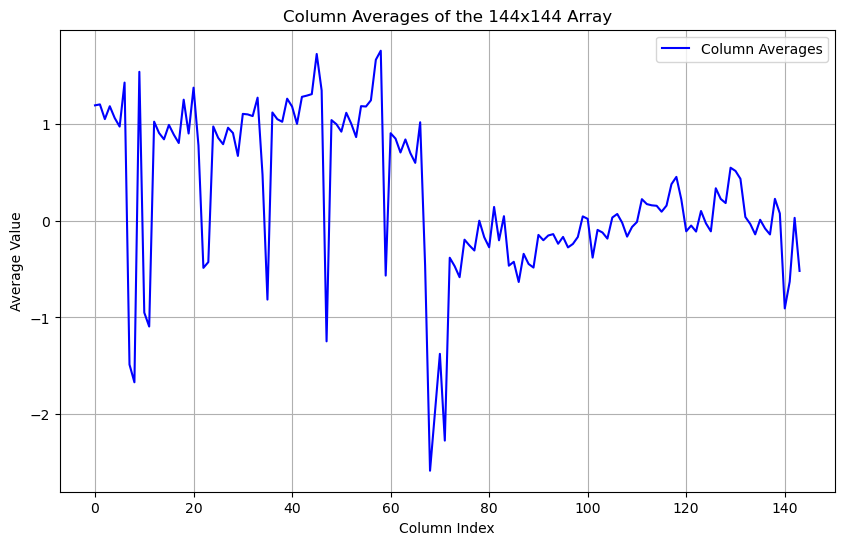

In [85]:
lat_start_idx = 0 
lat_end_idx = 2
lon_start_idx = 0 
lon_end_idx = 2

tensor = torch.tensor(
    input_surface[surface_var_idx[weather_var]],
    dtype=torch.float32
).unsqueeze(0).unsqueeze(0)
kernel = torch.ones((1, 1, 4, 4))
result = F.conv2d(tensor, kernel, stride=4)

for lat_idx in range(lat_start_idx, lat_end_idx):
    for lon_idx in range(lon_start_idx, lon_end_idx):
        attention_filtered = attention_output[lon_index, lat_index, head, :, :]
        attention_averages = np.mean(attention_filtered, axis=0)
        print(attention_averages.shape)

# Plot the column averages
plt.figure(figsize=(10, 6))
plt.plot(attention_averages, label='Column Averages', color='blue')
plt.title('Column Averages of the 144x144 Array')
plt.xlabel('Column Index')
plt.ylabel('Average Value')
plt.grid(True)
plt.legend()
plt.show()